<a href="https://colab.research.google.com/github/nikhilmishra1710/DIP/blob/main/histogram_equalisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [189]:
def load_image(path):
  img = cv2.imread(path)
  image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  initial_matrix_rgb=np.array(image_rgb)

  plt.imshow(initial_matrix_rgb)
  plt.show()

  dimensions = img.shape
  print(dimensions)

  print('Height of Image:', dimensions[0])
  print('Width of Image:', dimensions[1])
  print('Number of Channels:', dimensions[2])

  return initial_matrix_rgb


In [190]:
def convert_to_grayscale(initial_matrix_rgb):
  row = initial_matrix_rgb.shape[0]
  col = initial_matrix_rgb.shape[1]
  print(row,col)
  initial_matrix_gray = np.zeros((row,col),dtype="int")

  for i in range(row):
    for j in range(col):
      initial_matrix_gray[i,j]=int(round((initial_matrix_rgb[i,j,0]+initial_matrix_rgb[i,j,1]+initial_matrix_rgb[i,j,2])/3))

  plt.imshow(initial_matrix_gray,cmap="gray")
  plt.show()

  return initial_matrix_gray

In [191]:
def calculate_cdf(initial_matrix_gray):
    values = np.unique(initial_matrix_gray)
    print("Unique pixel values:", values)

    frequency = {}
    for value in values:
        frequency[value] = np.count_nonzero(initial_matrix_gray == value)

    print("Frequency of pixel values:", frequency)

    cdf = {}
    cdf[values[0]] = frequency[values[0]]

    for i in range(1, len(values)):
        cdf[values[i]] = cdf[values[i - 1]] + frequency[values[i]]

    print("Cumulative Distribution Function (CDF):", cdf)
    display_histogram(values,frequency.values(),'Original Image Histogram')
    display_cdf_curve(values,cdf.values(),'Original Image CDF')
    return cdf, values, frequency

In [192]:
def display_histogram(values,frequency,title):
  plt.bar(values, frequency, width=1, color='gray', edgecolor='black',label="Pixel frequency")
  plt.title(title)
  plt.xlabel('Pixel Value')
  plt.ylabel('Frequency')
  plt.xlim([0, 255])
  plt.xticks(np.arange(0, 256, 16))
  plt.grid(axis='y')
  plt.show()

def display_cdf_curve(values,cumulative_frequency,title):
  plt.plot(values, cumulative_frequency, color='blue', label='CDF')
  plt.title(title)
  plt.xlabel('Pixel Value')
  plt.ylabel('Cumulative Frequency')
  plt.xlim([0, 255])
  plt.xticks(np.arange(0, 256, 16))
  plt.grid(axis='y')
  plt.show()

In [193]:
def calculate_h(v,cdf,m,n,L=256):
    min_cdf = min(cdf.values())
    return round((L-1)*(cdf[v]-min_cdf)/((m*n)-min_cdf))

In [194]:
def equalize_matrix(initial_matrix_gray,cdf,values,frequency):
  h={}
  row = initial_matrix_gray.shape[0]
  col = initial_matrix_gray.shape[1]
  for value in values:
      h[value]=calculate_h(value,cdf,row,col)

  equalized_matrix_gray = np.zeros_like(initial_matrix_gray)

  for key, value in h.items():
      equalized_matrix_gray[initial_matrix_gray == key] = value

  print("Equalisied Cumulative Distribution Function (CDF):", h)
  display_histogram(h.values(),frequency.values(),'Equalized Image Histogram')
  display_cdf_curve(h.values(),h.values(),'Equalized Image CDF')
  plt.imshow(equalized_matrix_gray,cmap="gray")
  plt.show()

  return equalized_matrix_gray

In [195]:
def histogram_equalization(path):
  initial_matrix_rgb=load_image(path)
  initial_matrix_gray=convert_to_grayscale(initial_matrix_rgb)
  cdf,values,frequency=calculate_cdf(initial_matrix_gray)
  equalized_img = equalize_matrix(initial_matrix_gray,cdf,values,frequency)
  return equalized_img



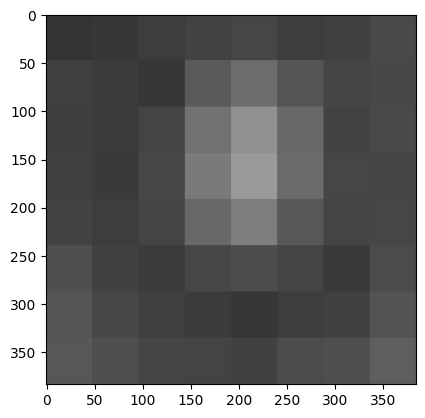

(384, 384, 3)
Height of Image: 384
Width of Image: 384
Number of Channels: 3
384 384


<ipython-input-190-0b2264356b7d>:9: RuntimeWarning: overflow encountered in scalar add
  initial_matrix_gray[i,j]=int(round((initial_matrix_rgb[i,j,0]+initial_matrix_rgb[i,j,1]+initial_matrix_rgb[i,j,2])/3))


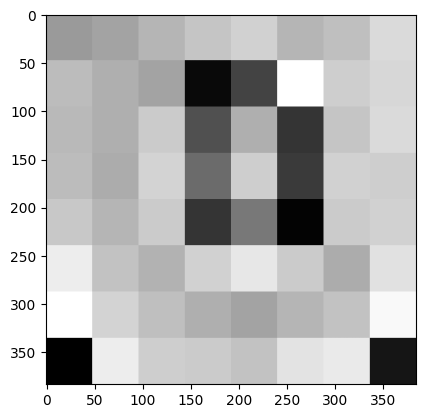

Unique pixel values: [ 2  3  5  9 19 21 24 28 37 41 52 55 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72 73 75 76 77 78 79 83 85]
Frequency of pixel values: {2: 2304, 3: 2304, 5: 2304, 9: 2304, 19: 4608, 21: 2304, 24: 2304, 28: 2304, 37: 2304, 41: 2304, 52: 2304, 55: 6912, 58: 4608, 59: 9216, 60: 2304, 61: 9216, 62: 2304, 63: 4608, 64: 4608, 65: 6912, 66: 4608, 67: 2304, 68: 11520, 69: 9216, 70: 9216, 71: 4608, 72: 2304, 73: 4608, 75: 2304, 76: 2304, 77: 2304, 78: 2304, 79: 4608, 83: 2304, 85: 4608}
Cumulative Distribution Function (CDF): {2: 2304, 3: 4608, 5: 6912, 9: 9216, 19: 13824, 21: 16128, 24: 18432, 28: 20736, 37: 23040, 41: 25344, 52: 27648, 55: 34560, 58: 39168, 59: 48384, 60: 50688, 61: 59904, 62: 62208, 63: 66816, 64: 71424, 65: 78336, 66: 82944, 67: 85248, 68: 96768, 69: 105984, 70: 115200, 71: 119808, 72: 122112, 73: 126720, 75: 129024, 76: 131328, 77: 133632, 78: 135936, 79: 140544, 83: 142848, 85: 147456}


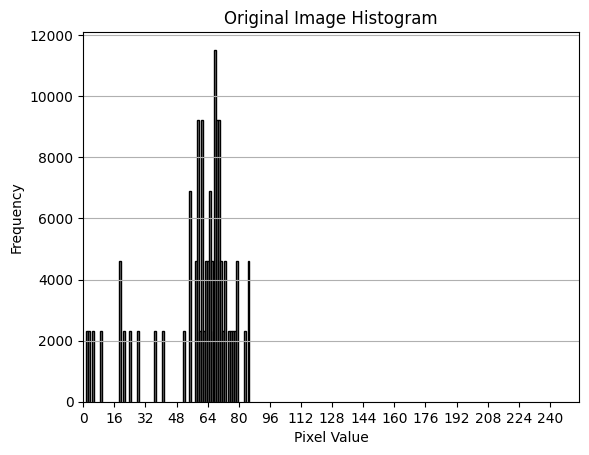

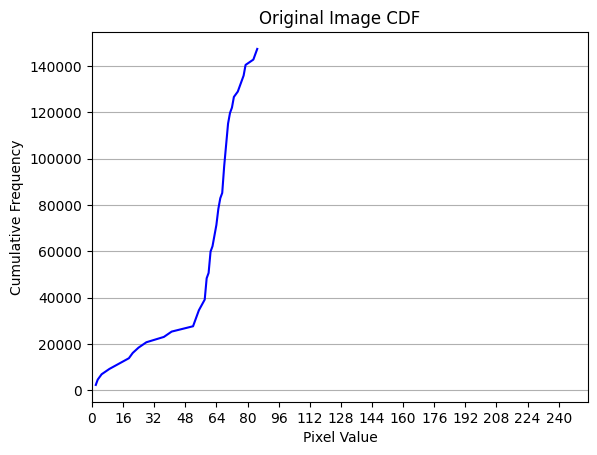

Equalisied Cumulative Distribution Function (CDF): {2: 0, 3: 4, 5: 8, 9: 12, 19: 20, 21: 24, 24: 28, 28: 32, 37: 36, 41: 40, 52: 45, 55: 57, 58: 65, 59: 81, 60: 85, 61: 101, 62: 105, 63: 113, 64: 121, 65: 134, 66: 142, 67: 146, 68: 166, 69: 182, 70: 198, 71: 206, 72: 210, 73: 219, 75: 223, 76: 227, 77: 231, 78: 235, 79: 243, 83: 247, 85: 255}


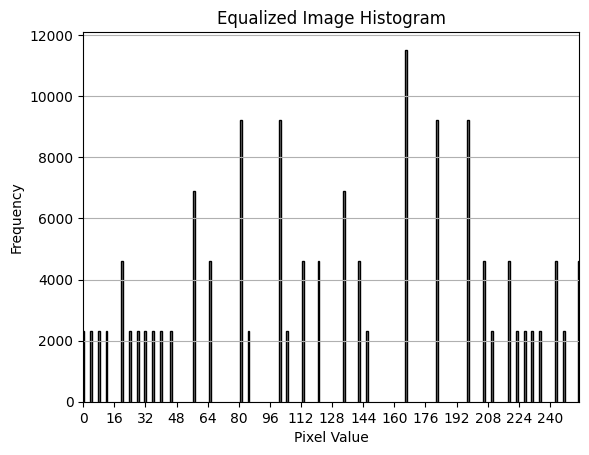

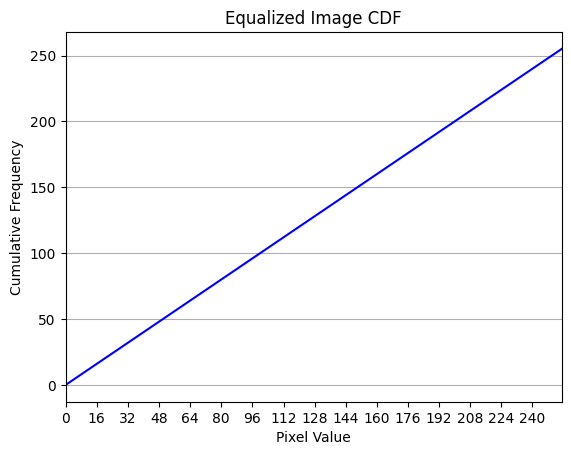

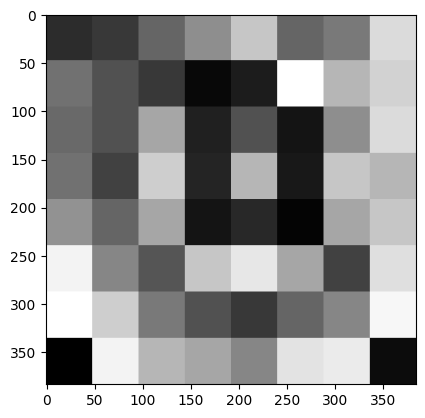

In [196]:
final_img=histogram_equalization('/content/image.png')

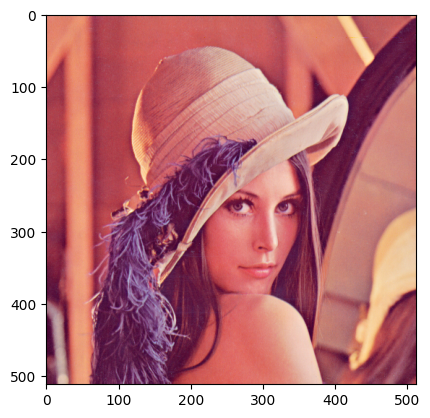

(512, 512, 3)
Height of Image: 512
Width of Image: 512
Number of Channels: 3
512 512


<ipython-input-190-0b2264356b7d>:9: RuntimeWarning: overflow encountered in scalar add
  initial_matrix_gray[i,j]=int(round((initial_matrix_rgb[i,j,0]+initial_matrix_rgb[i,j,1]+initial_matrix_rgb[i,j,2])/3))


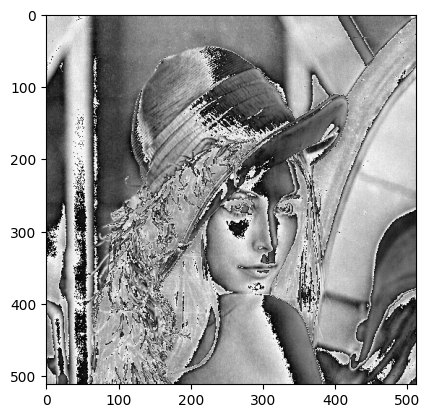

Unique pixel values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
Frequency of pixel values: {0: 1593, 1: 2336, 2: 2347, 3: 2278, 4: 2110, 5: 1998, 6: 1915, 7: 1916, 8: 1915, 9: 1981, 10: 1850, 11: 1990, 12: 2117, 13: 2107, 14: 2211, 15: 2335, 16: 2362, 17: 2533, 18: 2768, 19: 2835, 20: 2960, 21: 3064, 22: 2969, 23: 2936, 24: 2918, 25: 2952, 26: 2905, 27: 2824, 28: 2706, 29: 2781, 30: 2836, 31: 2628, 32: 2720, 33: 2652, 34: 2509, 35: 2535, 36: 2478, 37: 2369, 38: 2407, 39: 2386, 40: 2481, 41: 2549, 42: 2561, 43: 2791, 44: 2894, 45: 2848, 46: 2955, 47: 3200, 48: 3140, 49: 3253, 50: 3207, 51: 3242, 52: 3394, 53: 3598, 54: 3785, 55: 4170, 56: 4498, 57: 4708, 58: 4912, 59: 5078, 60: 5052, 61: 5109, 62: 4816, 63: 4862, 64: 4750, 65: 4791, 66: 4660, 67: 4618, 68: 4531, 69: 4581

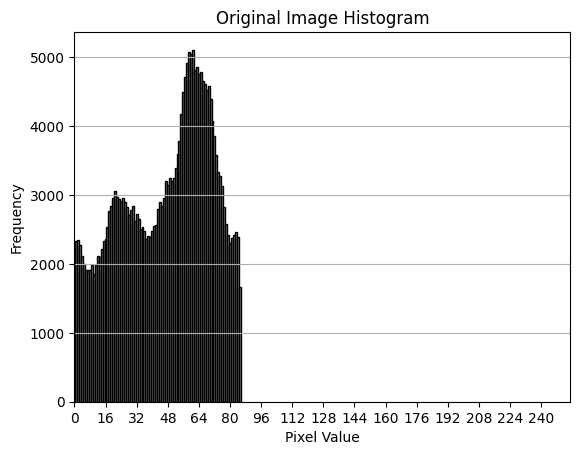

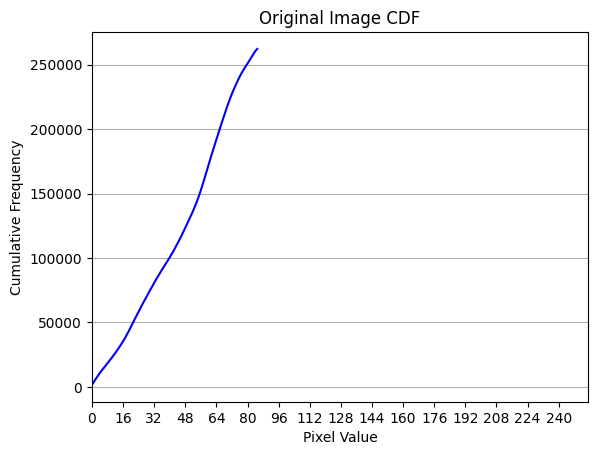

Equalisied Cumulative Distribution Function (CDF): {0: 0, 1: 2, 2: 5, 3: 7, 4: 9, 5: 11, 6: 13, 7: 15, 8: 16, 9: 18, 10: 20, 11: 22, 12: 24, 13: 26, 14: 28, 15: 31, 16: 33, 17: 36, 18: 38, 19: 41, 20: 44, 21: 47, 22: 50, 23: 53, 24: 56, 25: 58, 26: 61, 27: 64, 28: 67, 29: 69, 30: 72, 31: 75, 32: 77, 33: 80, 34: 82, 35: 85, 36: 87, 37: 90, 38: 92, 39: 94, 40: 97, 41: 99, 42: 102, 43: 105, 44: 107, 45: 110, 46: 113, 47: 116, 48: 119, 49: 122, 50: 126, 51: 129, 52: 132, 53: 136, 54: 139, 55: 143, 56: 148, 57: 152, 58: 157, 59: 162, 60: 167, 61: 172, 62: 177, 63: 182, 64: 186, 65: 191, 66: 195, 67: 200, 68: 204, 69: 209, 70: 213, 71: 217, 72: 221, 73: 224, 74: 228, 75: 231, 76: 234, 77: 237, 78: 239, 79: 242, 80: 244, 81: 246, 82: 249, 83: 251, 84: 253, 85: 255}


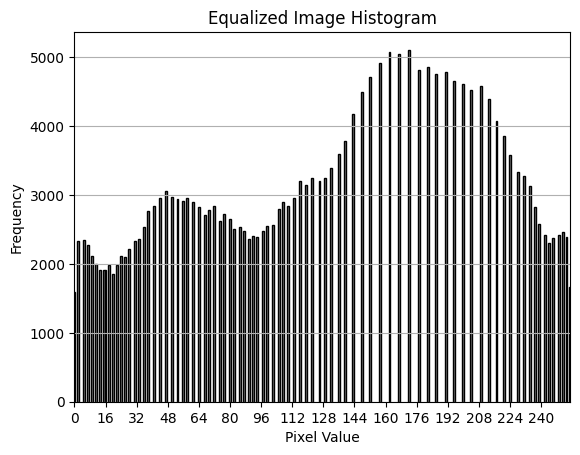

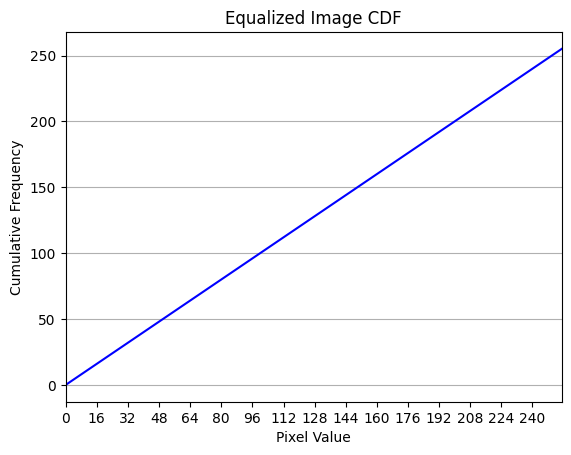

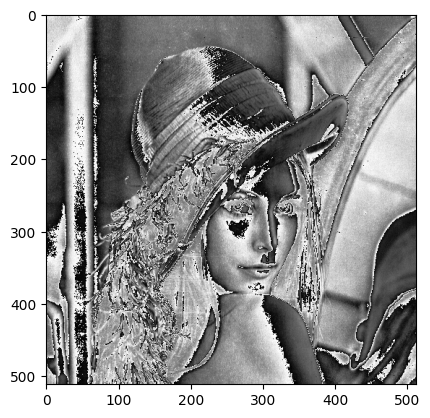

In [197]:
final_img = histogram_equalization('/content/lena.png')

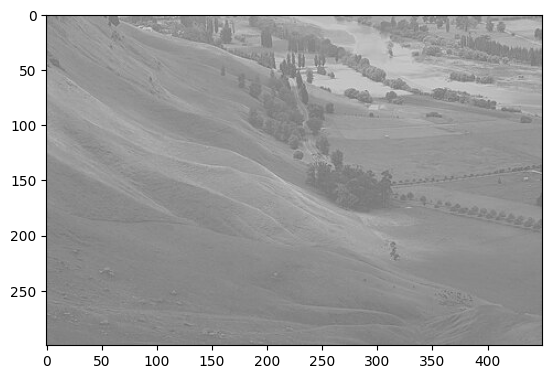

(300, 450, 3)
Height of Image: 300
Width of Image: 450
Number of Channels: 3
300 450


<ipython-input-190-0b2264356b7d>:9: RuntimeWarning: overflow encountered in scalar add
  initial_matrix_gray[i,j]=int(round((initial_matrix_rgb[i,j,0]+initial_matrix_rgb[i,j,1]+initial_matrix_rgb[i,j,2])/3))


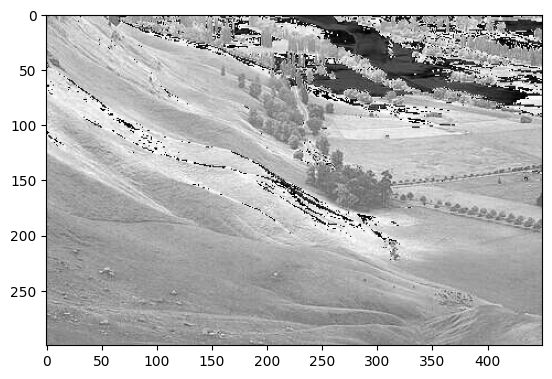

Unique pixel values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
Frequency of pixel values: {0: 667, 1: 627, 2: 594, 3: 583, 4: 473, 5: 421, 6: 427, 7: 320, 8: 312, 9: 274, 10: 279, 11: 287, 12: 293, 13: 251, 14: 307, 15: 291, 16: 288, 17: 299, 18: 321, 19: 283, 20: 265, 21: 271, 22: 277, 23: 269, 24: 326, 25: 355, 26: 364, 27: 269, 28: 231, 29: 172, 30: 170, 31: 130, 32: 120, 33: 128, 34: 161, 35: 200, 36: 250, 37: 352, 38: 434, 39: 499, 40: 641, 41: 720, 42: 851, 43: 1052, 44: 1378, 45: 1649, 46: 2084, 47: 2629, 48: 3018, 49: 3544, 50: 4226, 51: 4782, 52: 5285, 53: 5454, 54: 4959, 55: 4728, 56: 4446, 57: 4077, 58: 3934, 59: 3701, 60: 3695, 61: 3649, 62: 3583, 63: 3540, 64: 3443, 65: 3392, 66: 3299, 67: 3409, 68: 3096, 69: 2920, 70: 2698, 71: 2462, 72: 2280, 73: 2111, 7

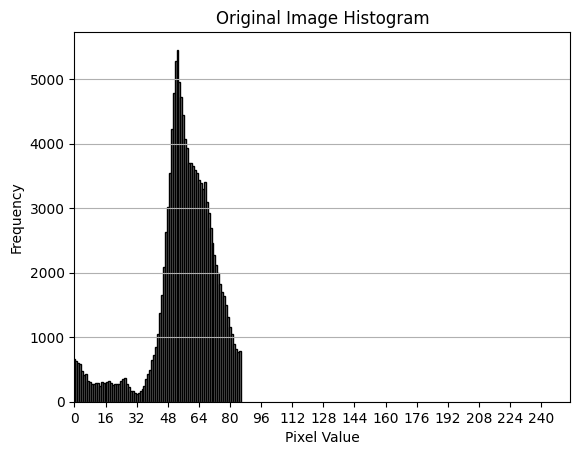

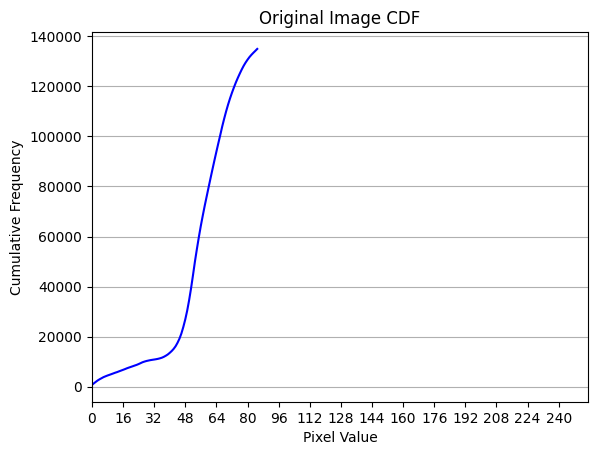

Equalisied Cumulative Distribution Function (CDF): {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 7, 9: 8, 10: 8, 11: 9, 12: 9, 13: 10, 14: 10, 15: 11, 16: 11, 17: 12, 18: 13, 19: 13, 20: 14, 21: 14, 22: 15, 23: 15, 24: 16, 25: 17, 26: 17, 27: 18, 28: 18, 29: 18, 30: 19, 31: 19, 32: 19, 33: 20, 34: 20, 35: 20, 36: 21, 37: 21, 38: 22, 39: 23, 40: 24, 41: 26, 42: 27, 43: 29, 44: 32, 45: 35, 46: 39, 47: 44, 48: 50, 49: 56, 50: 64, 51: 74, 52: 84, 53: 94, 54: 103, 55: 112, 56: 121, 57: 129, 58: 136, 59: 143, 60: 150, 61: 157, 62: 164, 63: 170, 64: 177, 65: 183, 66: 190, 67: 196, 68: 202, 69: 208, 70: 213, 71: 217, 72: 222, 73: 226, 74: 230, 75: 233, 76: 236, 77: 239, 78: 242, 79: 245, 80: 247, 81: 249, 82: 251, 83: 252, 84: 254, 85: 255}


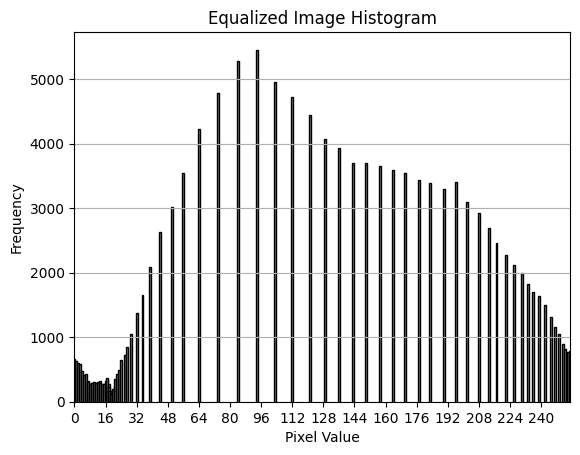

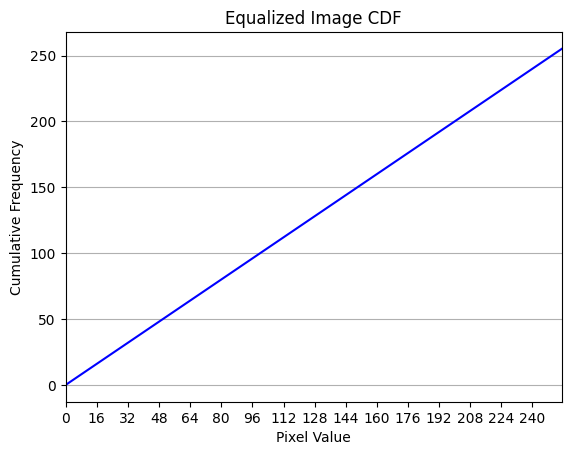

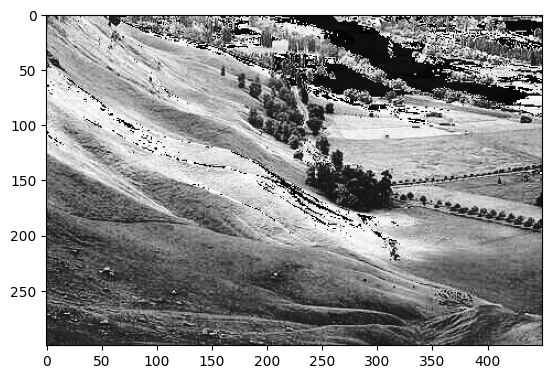

In [198]:
final_img = histogram_equalization('/content/image3.jpg')